# Tech Challenge - Fase 1: An√°lise Preditiva de Diabetes

## Introdu√ß√£o

### üéØ **Objetivo do Projeto**:

Desenvolver um modelo de Machine Learning que estime a probabilidade de um paciente apresentar diabetes, com base em vari√°veis cl√≠nicas e fisiol√≥gicas. O prop√≥sito √© apoiar o diagn√≥stico precoce, contribuindo para o tratamento preventivo e a melhoria da qualidade de vida dos pacientes.

### üìå Problema de Neg√≥cio:

O diabetes √© uma condi√ß√£o cr√¥nica que pode levar a complica√ß√µes severas se n√£o diagnosticada e tratada a tempo. O desenvolvimento de um sistema preditivo pode auxiliar na triagem de pacientes em risco, otimizando a prioriza√ß√£o de atendimentos e o uso de recursos m√©dicos, sobretudo em contextos de alta demanda.

### üìä Dataset:

Foi utilizado o [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data) do [Kaggle](https://www.kaggle.com), amplamente adotado em benchmarks de classifica√ß√£o. Ele cont√©m dados de pacientes do sexo feminino, com mais de 21 anos, da etnia Pima (grupo ind√≠gena norte-americano), o que pode implicar em vi√©s populacional, exigindo cuidado ao generalizar os resultados para outras popula√ß√µes.

### üß™ Metodologia:

**1 - An√°lise e Limpeza dos Dados:**
Verifica√ß√£o de valores ausentes, inconsistentes (como zeros em vari√°veis cl√≠nicas) e prepara√ß√£o do dataset para modelagem.

**2 - An√°lise Explorat√≥ria de Dados (EDA):**
Visualiza√ß√µes para explorar correla√ß√µes, distribui√ß√£o de vari√°veis, e sua rela√ß√£o com o desfecho (presen√ßa de diabetes).

**3 - Pr√©-processamento e Modelagem:**
Aplica√ß√£o de t√©cnicas de normaliza√ß√£o, tratamento de desbalanceamento de classes, divis√£o em conjuntos de treino e teste, e treinamento de modelos de classifica√ß√£o.

**4 - Avalia√ß√£o e Interpreta√ß√£o:**
Uso de m√©tricas como AUC, F1-score e matriz de confus√£o para avaliar a performance, com an√°lise interpretativa para extra√ß√£o de insights.

## 1. Importa√ß√£o das Bibliotecas

Importar bibliotecas √© uma etapa crucial e deve ser feita de forma organizada, categorizando-as por tipo:

In [ ]:
# Importa√ß√£o das bibliotecas essenciais para an√°lise e visualiza√ß√£o de dados

# pandas e numpy: manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np

# matplotlib e seaborn: visualiza√ß√£o gr√°fica
import matplotlib.pyplot as plt
import seaborn as sns

# Pr√©-processamento e modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Avalia√ß√£o
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# Configura√ß√µes de visualiza√ß√£o
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

## 2. Carregamento e An√°lise Inicial dos Dados

Nesta etapa realizamos o carregamento dos dados e executamos an√°lises preliminares para entender sua estrutura, poss√≠veis inconsist√™ncias e caracter√≠sticas estat√≠sticas gerais. Essa √© uma pr√°tica fundamental para nortear as pr√≥ximas fases do projeto.

Esta se√ß√£o permanece a mesma. Carregamos os dados e exploramos suas caracter√≠sticas, confirmando o desbalanceamento das classes.

In [ ]:
# Para executar no Colab, primeiro fa√ßa o upload do arquivo 'heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/src/diabetes.csv')
print("\nPrimeiras 5 linhas do dataset:")
display(df.head())


Primeiras 5 linhas do dataset:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

| Coluna                    | Descri√ß√£o                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Pregnancies               | N√∫mero de vezes que a paciente esteve gr√°vida.                                                                            |
| Glucose                   | Concentra√ß√£o de glicose no plasma 2 horas ap√≥s um teste oral de toler√¢ncia √† glicose.                                     |
| BloodPressure             | Press√£o arterial diast√≥lica (mm Hg).                                                                                      |
| SkinThickness             | Espessura da dobra cut√¢nea do tr√≠ceps (mm).                                                                               |
| Insulin                   | N√≠vel de insulina no soro ap√≥s 2 horas (mu U/ml).                                                                         |
| BMI                       | √çndice de Massa Corporal (calculado como peso em kg / (altura em m)¬≤).                                                    |
| DiabetesPedigreeFunction  | Fun√ß√£o de pedigree de diabetes, que representa uma pontua√ß√£o da probabilidade de diabetes com base no hist√≥rico familiar. |
| Age                       | Idade da paciente (em anos).                                                                                              |
| Outcome **(Alvo)**        | Vari√°vel alvo que indica o diagn√≥stico (0 = N√£o Diab√©tico, 1 = Diab√©tico).                                                |

In [5]:
df.shape

(768, 9)

Neste dataset temos 768 linhas e 9 colunas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


üî¢ Tamanho do Dataset:
O dataset cont√©m **768 registros e 9 vari√°veis**. Esse volume √© considerado moderado para tarefas de classifica√ß√£o supervisionada. Ele permite experimenta√ß√£o √°gil com algoritmos de aprendizado de m√°quina, mantendo tempos de treinamento e valida√ß√£o curtos. No entanto, **a qualidade e o balanceamento das classes** s√£o aspectos cr√≠ticos que devem ser verificados para garantir que os modelos n√£o fiquem enviesados ou superajustados.

üîç An√°lise Inicial
O dataset n√£o apresenta valores nulos (`null`) **expl√≠citos**, conforme identificado na inspe√ß√£o com df.`info()`. No entanto, uma an√°lise estat√≠stica com `df.describe()` revela **inconsist√™ncias fisiol√≥gicas graves**.

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**‚ö†Ô∏è Problema Cr√≠tico: Dados Ausentes Mascarados como Zeros**

As colunas:

- `Glucose` (glicose)
- `BloodPressure` (press√£o arterial diast√≥lica)
- `SkinThickness` (espessura da pele)
- `Insulin` (n√≠vel de insulina)
- `BMI` (√≠ndice de massa corporal)

apresentam valores m√≠nimos iguais a `0`. Do ponto de vista cl√≠nico, `n√£o √© poss√≠vel` que essas vari√°veis fisiol√≥gicas assumam valor zero em uma pessoa viva. Portanto, esses zeros n√£o representam medidas reais, mas sim `valores ausentes codificados incorretamente` - o que √© uma pr√°tica comum em alguns datasets m√©dicos antigos.

## 3. Limpeza e Pr√©-processamento dos Dados

### 3.1 üîß Tratamento de Valores Inconsistentes (Zeros)

Nas colunas `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI`, os valores 0 representam dados ausentes que foram registrados de forma inadequada. Para trat√°-los corretamente, vamos:

**1 - Substituir os zeros por `NaN` (Not a Number)** ‚Äì que √© a conven√ß√£o do pandas para representar dados faltantes.

**2 - Imputar os valores ausentes com a mediana de cada coluna** ‚Äì a mediana √© resistente a outliers e fornece uma medida central mais confi√°vel para vari√°veis com distribui√ß√£o assim√©trica.

Essa abordagem garante que os modelos de machine learning n√£o sejam influenciados por dados irrealistas e que a integridade estat√≠stica das vari√°veis seja preservada.

In [8]:
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

print("Contagem de valores nulos AP√ìS substituir os zeros:")
print(df.isnull().sum())

Contagem de valores nulos AP√ìS substituir os zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**üìå Importante:**
Esse procedimento revela que a aparente aus√™ncia de valores nulos no dataset era, na verdade, um **falso negativo**. Ap√≥s substituir os zeros por `NaN`, a presen√ßa de dados ausentes torna-se expl√≠cita e pode ser corretamente tratada. Esse tipo de verifica√ß√£o √© essencial em datasets cl√≠nicos, onde registros "zero" muitas vezes ocultam informa√ß√µes faltantes.

In [9]:
# Preenchendo os valores NaN com a mediana de cada coluna
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Verifica√ß√£o de nulos AP√ìS imputa√ß√£o:")
print(df_imputed.isnull().sum().sum())

print("\nEstat√≠sticas descritivas do dataset limpo:")
display(df_imputed.describe())

Verifica√ß√£o de nulos AP√ìS imputa√ß√£o:
0

Estat√≠sticas descritivas do dataset limpo:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## 4. An√°lise Explorat√≥ria de Dados (EDA)

### 4.1 üìä An√°lise da Vari√°vel Alvo (`Outcome`)

Nesta etapa, analisamos a distribui√ß√£o da vari√°vel-alvo Outcome, onde:

- `0` representa indiv√≠duos n√£o diab√©ticos
- `1` representa indiv√≠duos diab√©ticos

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_30807/2433008006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_imputed, palette='viridis')


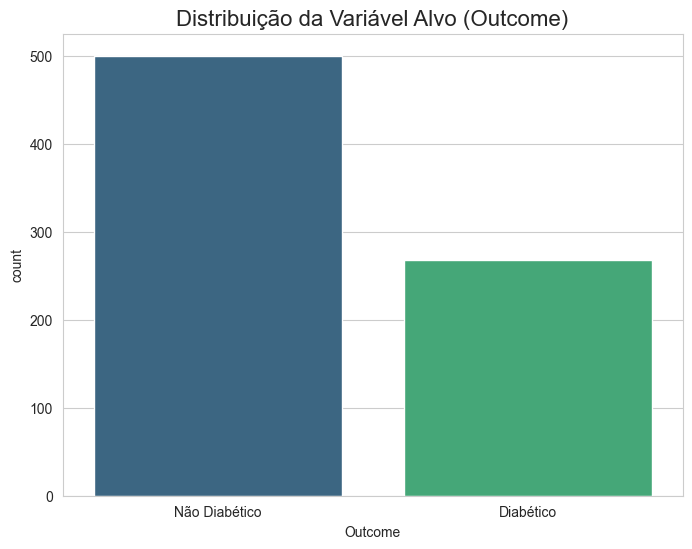

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df_imputed, palette='viridis')
plt.title('Distribui√ß√£o da Vari√°vel Alvo (Outcome)', fontsize=16)
plt.xticks([0, 1], ['N√£o Diab√©tico', 'Diab√©tico'])
plt.show()
print(df_imputed['Outcome'].value_counts(normalize=True))

**‚öñÔ∏è Balanceamento de Classes**

O dataset apresenta uma distribui√ß√£o de aproximadamente **65% de n√£o diab√©ticos** e **35% de diab√©ticos**. Apesar de n√£o ser um desbalanceamento extremo, ele **pode impactar negativamente o desempenho de algoritmos de classifica√ß√£o**, especialmente aqueles que buscam maximizar a acur√°cia global.

**üìå Recomenda√ß√£o:**

Utilizar t√©cnicas que considerem o desbalanceamento, como:

- Ajuste de pesos com `class_weight='balanced'` em modelos como `LogisticRegression` e `RandomForest`
- T√©cnicas de oversampling (ex: `SMOTE`) ou undersampling

### 4.2 Matriz de Correla√ß√£o

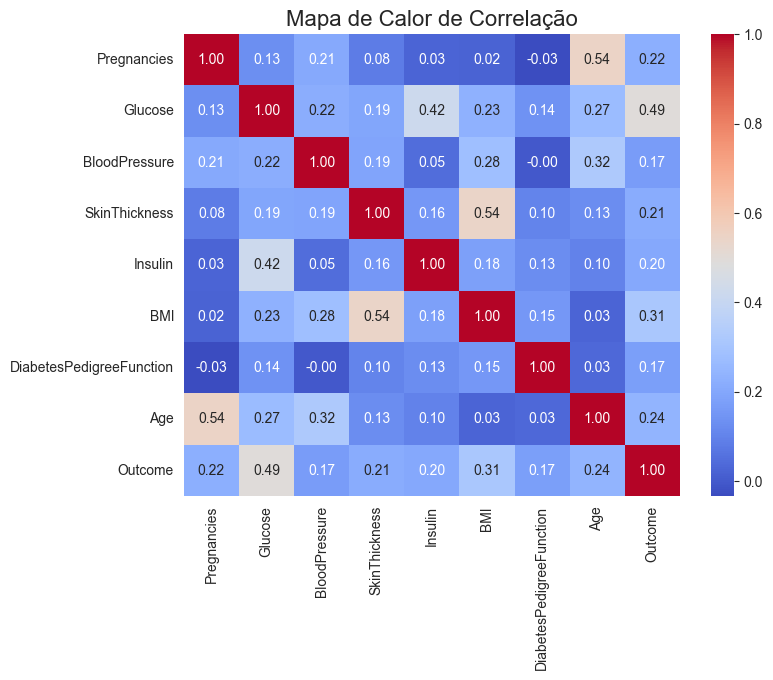

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correla√ß√£o', fontsize=16)
plt.show()

**üìà Correla√ß√£o com a Vari√°vel Alvo**

A matriz de correla√ß√£o indica as seguintes vari√°veis com maior associa√ß√£o com o diagn√≥stico de diabetes (`Outcome`):

- `Glucose`: **0.49** ‚Äî forte correla√ß√£o positiva, o que √© esperado dado o contexto cl√≠nico
- `BMI`: **0.31** ‚Äî rela√ß√£o positiva indicando que maior IMC est√° associado √† diabetes
- `Age`: **0.24** ‚Äî tend√™ncia crescente de risco com o avan√ßo da idade

Al√©m disso, observamos que:

`Pregnancies` e `Age` apresentam correla√ß√£o moderada entre si (**0.54**), o que pode refletir um efeito demogr√°fico ‚Äî mulheres com mais idade tendem a ter tido mais gesta√ß√µes.

### 4.3 üîç An√°lise Multivariada (Cruzamento de Vari√°veis)

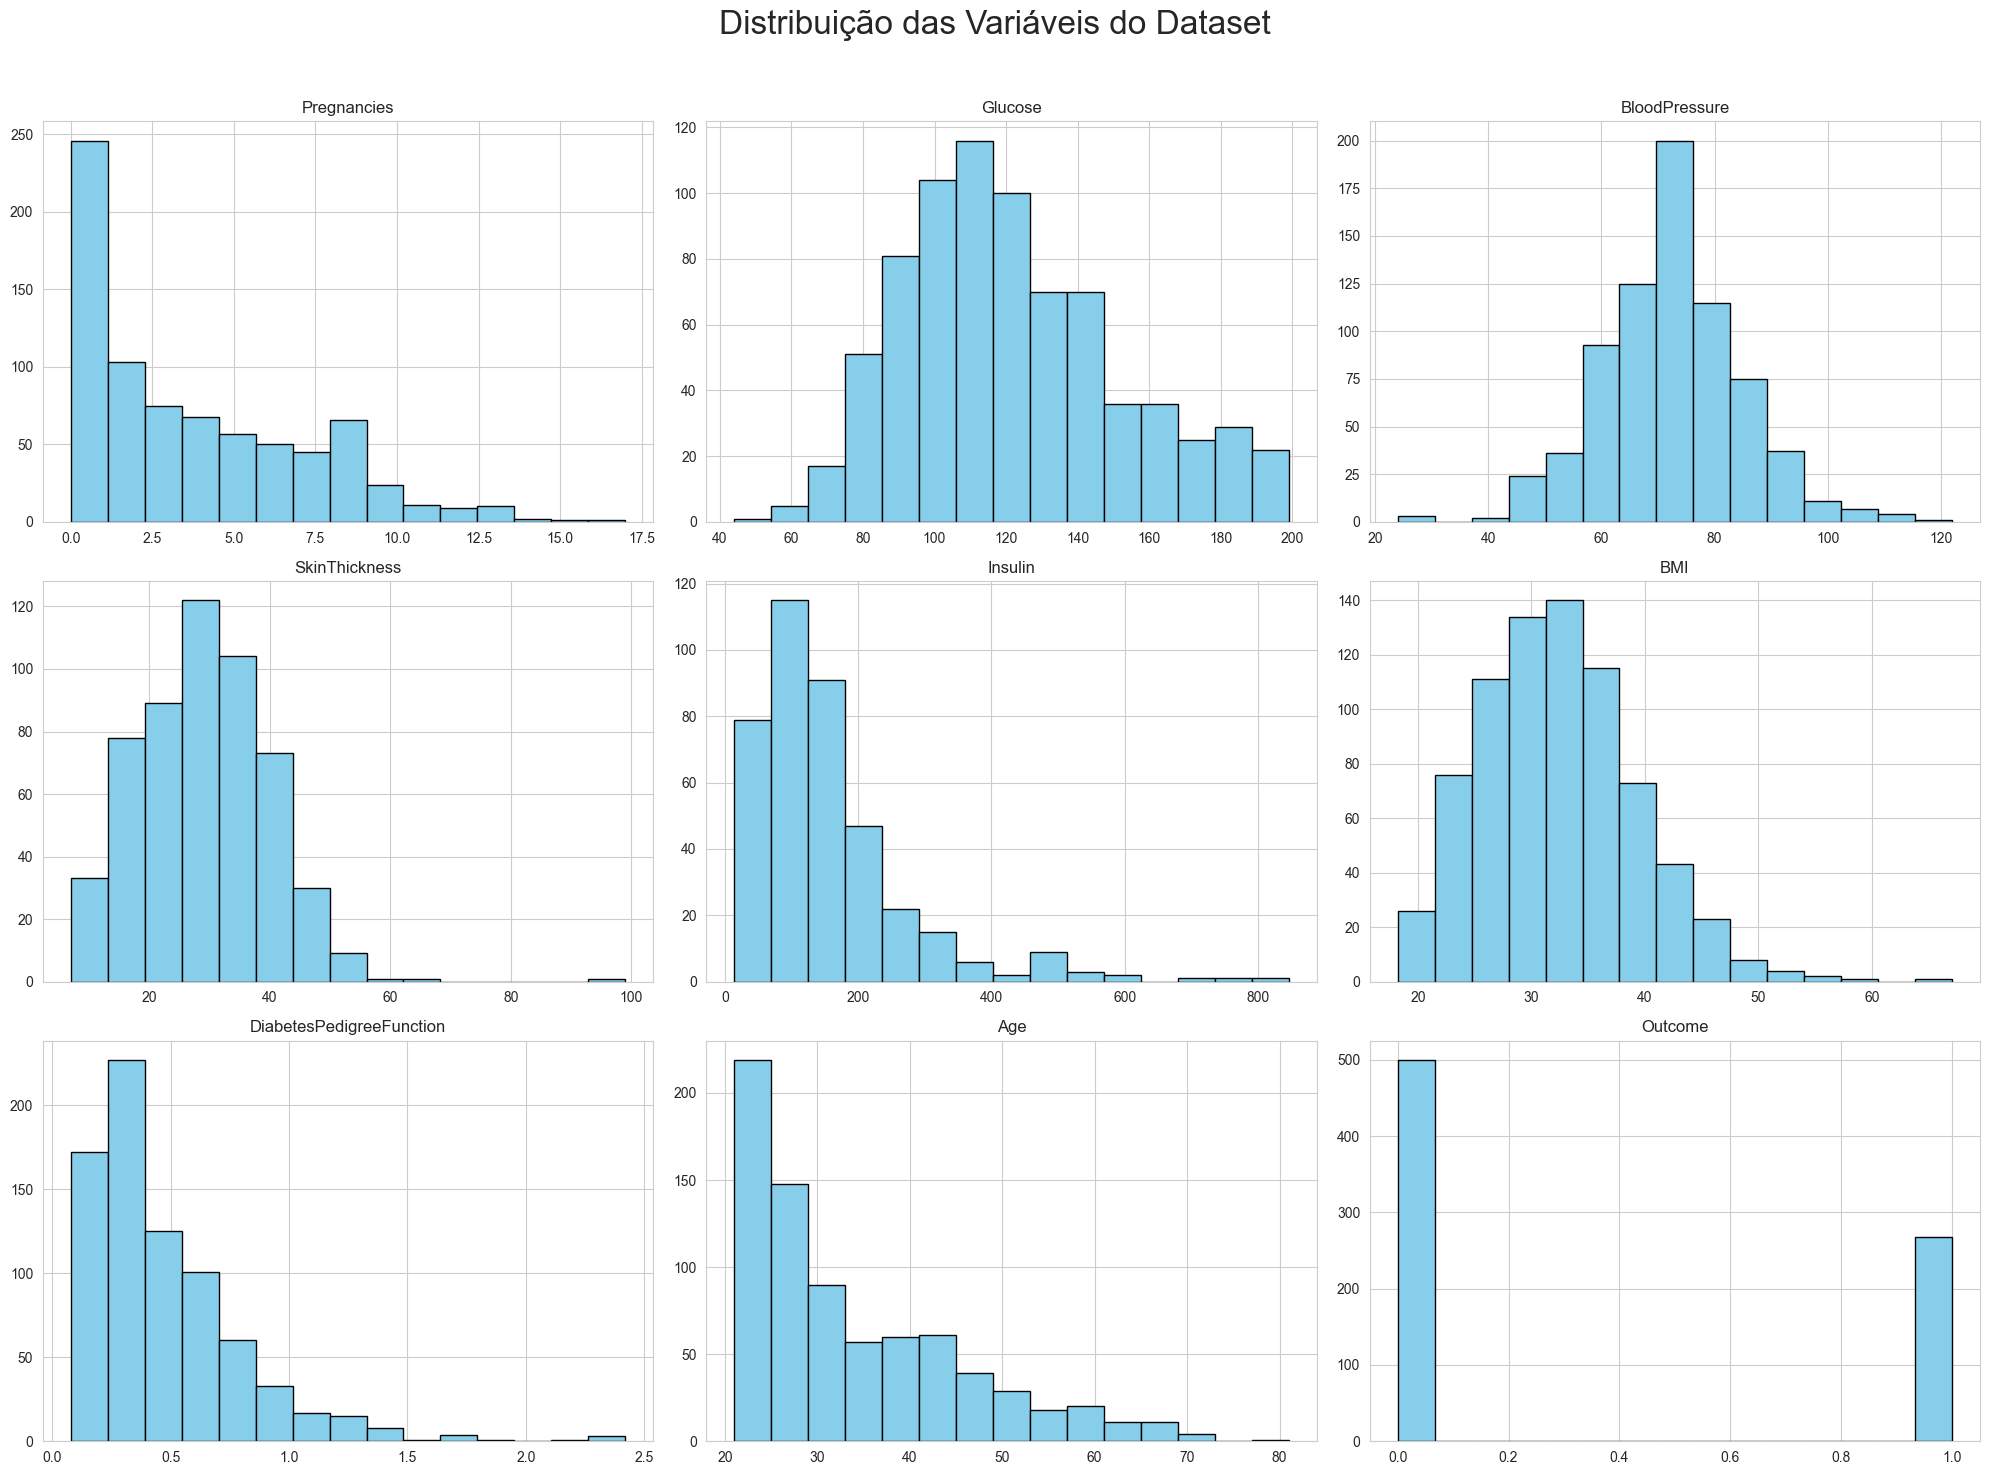

In [12]:
df.hist(figsize=(20, 15), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribui√ß√£o das Vari√°veis do Dataset', size=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**üìå An√°lise do Gr√°fico 1: Glicose vs. IMC colorido por `Outcome`**

Este gr√°fico revela um padr√£o bastante claro:
- Pontos vermelhos (diab√©ticos) est√£o majoritariamente concentrados nas regi√µes de alta glicose e alto IMC
- J√° os n√£o diab√©ticos tendem a se concentrar em √°reas de valores mais baixos dessas vari√°veis

**üí° Interpreta√ß√£o:**
A combina√ß√£o de glicose elevada e IMC elevado √© um forte indicador de risco de diabetes.
Apesar de haver alguma sobreposi√ß√£o entre as classes (o que √© comum em dados reais), o padr√£o geral √© bastante evidente.

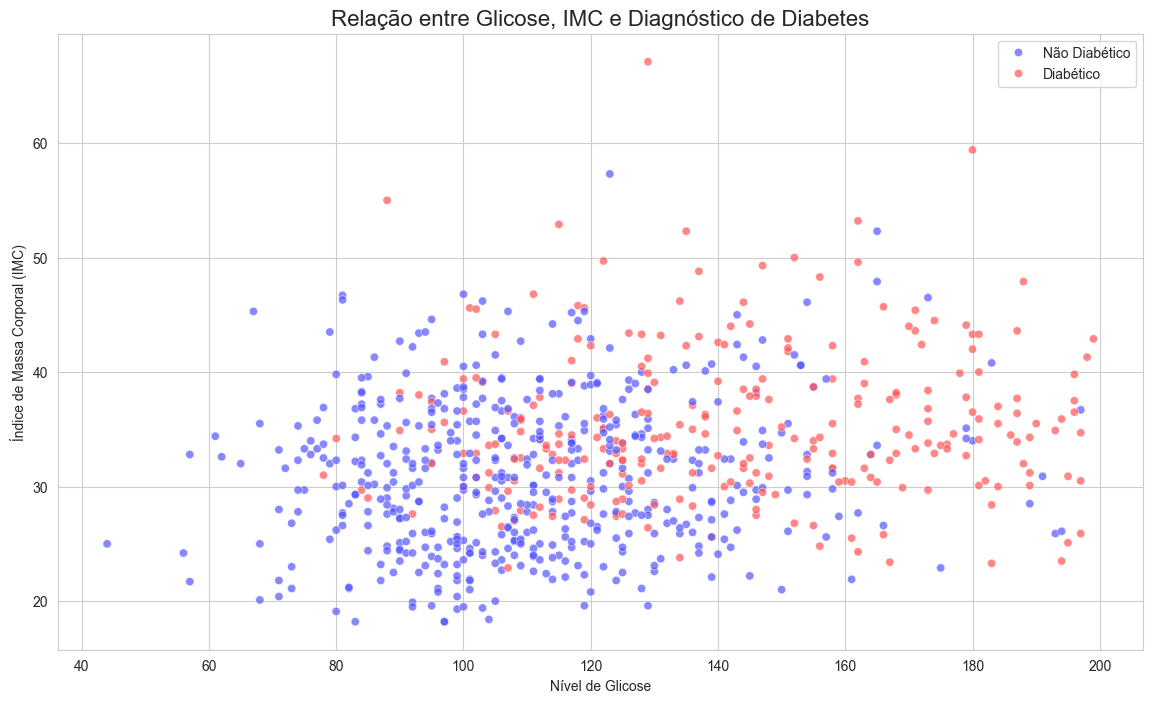

In [13]:
# Gr√°fico 1: Glicose vs. IMC, colorido pelo Diagn√≥stico
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_imputed, x='Glucose', y='BMI', hue='Outcome', palette='seismic', alpha=0.7)
plt.title('Rela√ß√£o entre Glicose, IMC e Diagn√≥stico de Diabetes', fontsize=16)
plt.xlabel('N√≠vel de Glicose')
plt.ylabel('√çndice de Massa Corporal (IMC)')
leg = plt.legend()
leg.get_texts()[0].set_text('N√£o Diab√©tico')
leg.get_texts()[1].set_text('Diab√©tico')
plt.show()

**üìå An√°lise do Gr√°fico 2: Press√£o Arterial vs. Idade, segmentado por `Outcome`**

Este gr√°fico analisa a rela√ß√£o entre idade e press√£o arterial diast√≥lica (`BloodPressure`), diferenciando os indiv√≠duos diab√©ticos e n√£o diab√©ticos por cores.

**üß≠ Pontos-chave da an√°lise:**
- Para **ambos os grupos**, h√° uma **tend√™ncia de aumento da press√£o arterial com o avan√ßo da idade**, como indicado pelas **linhas de regress√£o com inclina√ß√£o positiva**.

- A **distribui√ß√£o dos pontos para o grupo diab√©tico (representado em roxo escuro)** tende a se concentrar **ligeiramente acima da m√©dia** dos n√£o diab√©ticos em praticamente toda a faixa et√°ria ‚Äî especialmente a partir dos 40 anos.

**üí° Interpreta√ß√£o:**
Esse comportamento est√° em linha com evid√™ncias cl√≠nicas, que apontam que a hipertens√£o √© um fator de risco comum e frequentemente associado √† diabetes tipo 2. O gr√°fico sugere que indiv√≠duos diab√©ticos, em geral, apresentam press√£o arterial mais elevada, especialmente em idades mais avan√ßadas.

**‚ö†Ô∏è Observa√ß√£o importante:**
A correla√ß√£o entre `BloodPressure` e `Age` pode n√£o ser forte isoladamente, mas a **intera√ß√£o entre essas vari√°veis pode carregar sinal preditivo** que deve ser explorado em modelos mais complexos ou na engenharia de vari√°veis (ex: criar uma feature combinada ou n√£o linear).

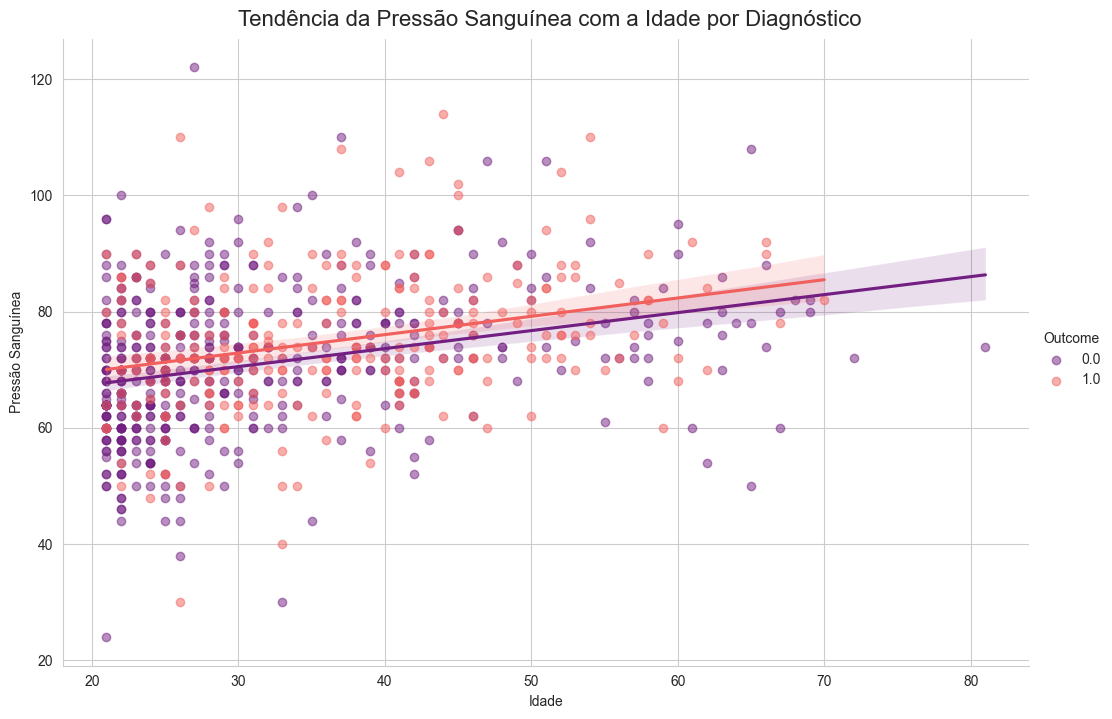

In [ ]:
# Gr√°fico 2
g = sns.lmplot(data=df_imputed, x='Age', y='BloodPressure', hue='Outcome', 
    palette='magma', height=7, aspect=1.5,
    scatter_kws={'alpha':0.5})
g.fig.suptitle('Tend√™ncia da Press√£o Sangu√≠nea com a Idade por Diagn√≥stico', y=1.02, fontsize=16)
g.set_axis_labels("Idade", "Press√£o Sangu√≠nea")
plt.show()

**üìå An√°lise do Gr√°fico 2: Press√£o Arterial vs. Idade, segmentado por `Outcome`**

Este gr√°fico analisa a rela√ß√£o entre idade e press√£o arterial diast√≥lica (`BloodPressure`), diferenciando os indiv√≠duos diab√©ticos e n√£o diab√©ticos por cores.

**üß≠ Pontos-chave da an√°lise:**
- Para **ambos os grupos**, h√° uma **tend√™ncia de aumento da press√£o arterial com o avan√ßo da idade**, como indicado pelas **linhas de regress√£o com inclina√ß√£o positiva**.

- A **distribui√ß√£o dos pontos para o grupo diab√©tico (representado em roxo escuro)** tende a se concentrar **ligeiramente acima da m√©dia** dos n√£o diab√©ticos em praticamente toda a faixa et√°ria ‚Äî especialmente a partir dos 40 anos.

**üí° Interpreta√ß√£o:**
Esse comportamento est√° em linha com evid√™ncias cl√≠nicas, que apontam que a hipertens√£o √© um fator de risco comum e frequentemente associado √† diabetes tipo 2. O gr√°fico sugere que indiv√≠duos diab√©ticos, em geral, apresentam press√£o arterial mais elevada, especialmente em idades mais avan√ßadas.

**‚ö†Ô∏è Observa√ß√£o importante:**
A correla√ß√£o entre `BloodPressure` e `Age` pode n√£o ser forte isoladamente, mas a **intera√ß√£o entre essas vari√°veis pode carregar sinal preditivo** que deve ser explorado em modelos mais complexos ou na engenharia de vari√°veis (ex: criar uma feature combinada ou n√£o linear).

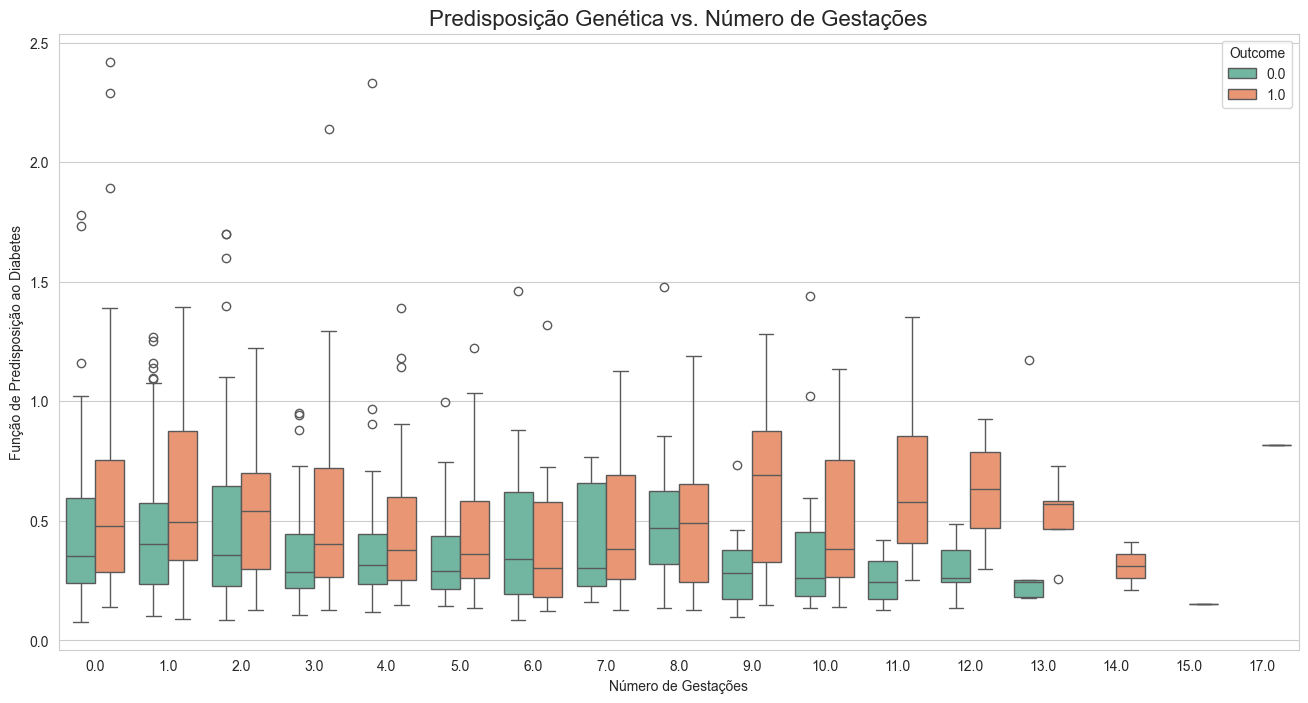

In [ ]:
# Gr√°fico 3
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_imputed, x='Pregnancies', y='DiabetesPedigreeFunction', hue='Outcome', palette='Set2')
plt.title('Predisposi√ß√£o Gen√©tica vs. N√∫mero de Gesta√ß√µes', fontsize=16)
plt.xlabel('N√∫mero de Gesta√ß√µes')
plt.ylabel('Fun√ß√£o de Predisposi√ß√£o ao Diabetes')
plt.show()

**üìå An√°lise do Gr√°fico 3:** `DiabetesPedigreeFunction` vs. `Pregnancies`, **segmentado por `Outcome`**
Este gr√°fico utiliza boxplots para representar a distribui√ß√£o da vari√°vel DiabetesPedigreeFunction (medida de predisposi√ß√£o gen√©tica) ao longo dos diferentes valores de Pregnancies (n√∫mero de gesta√ß√µes), separando os grupos diab√©ticos e n√£o diab√©ticos.

**üß¨ Contexto da vari√°vel:**
A `DiabetesPedigreeFunction` combina informa√ß√µes gen√©ticas e familiares para estimar o grau de risco heredit√°rio de desenvolver diabetes. Valores mais altos indicam maior predisposi√ß√£o gen√©tica.

**üìä Principais observa√ß√µes:**

- Para **quase todos os valores de `Pregnancies`**, a mediana da `DiabetesPedigreeFunction` √© **visivelmente maior** no grupo diab√©tico (representado pelas **caixas laranjas**), em compara√ß√£o ao grupo n√£o diab√©tico (caixas azuis, por exemplo).
- Isso sugere que a **predisposi√ß√£o gen√©tica √© um fator de risco significativo, independente do n√∫mero de gesta√ß√µes**.

**üí° Interpreta√ß√£o:**
Este padr√£o refor√ßa a ideia de que a **hereditariedade tem um papel importante no desenvolvimento do diabetes tipo 2**, e que esse fator de risco se manifesta consistentemente em diferentes subgrupos populacionais (ex: mulheres com diferentes hist√≥ricos de gesta√ß√µes).

**‚ö†Ô∏è Relev√¢ncia para modelagem:**
A vari√°vel `DiabetesPedigreeFunction`, embora frequentemente subestimada por ter distribui√ß√£o assim√©trica e valores baixos, **carrega sinal preditivo relevante** e deve ser mantida no conjunto de vari√°veis do modelo, especialmente em classificadores que conseguem capturar intera√ß√µes n√£o lineares.

### B√¥nus - An√°lise detalhada utilizando Pandas Profiling

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Relat√≥rio de An√°lise de Diabetes")
# profile.to_notebook_iframe()
profile.to_file("./diabetes_report.html")

/Users/antoniorafael/workspace/Personal/ai/pos/tech-challenge/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 31.77it/s]


---

## 5. Pr√©-processamento Final e Modelagem

#### Divis√£o em treino e teste com estratifica√ß√£o

In [17]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### ‚öôÔ∏è Normaliza√ß√£o dos Dados (Padroniza√ß√£o)

Antes de treinarmos nossos modelos, √© essencial realizar o pr√©-processamento dos dados. Neste caso, adotamos a t√©cnica de padroniza√ß√£o, que √© especialmente indicada quando usamos algoritmos sens√≠veis √† escala dos dados, como Regress√£o Log√≠stica, SVM e Redes Neurais.


#### üß† Por que a padroniza√ß√£o √© necess√°ria?

Nosso dataset cont√©m vari√°veis com escalas muito diferentes:

- `Glucose` pode atingir valores acima de **150**
- `DiabetesPedigreeFunction` normalmente fica abaixo de **1.0**

Algoritmos baseados em dist√¢ncia (como KNN, SVM e PCA) ou m√©todos lineares (como regress√£o log√≠stica) **n√£o sabem diferenciar entre escala e import√¢ncia estat√≠stica**. Isso significa que **vari√°veis com maiores magnitudes num√©ricas podem dominar o processo de aprendizado**, mesmo que n√£o sejam mais relevantes para a predi√ß√£o.

#### üí° Consequ√™ncia:
Sem padroniza√ß√£o, o modelo pode:

- Convergir mais lentamente durante o treinamento
- Gerar coeficientes enviesados
- Subestimar vari√°veis com menor escala, mesmo que altamente preditivas

#### üß™ O que significa padronizar?
A padroniza√ß√£o transforma cada vari√°vel para que tenha:

- M√©dia = 0
- Desvio padr√£o = 1

Ou seja, todas as vari√°veis passam a estar na mesma r√©gua estat√≠stica, o que permite ao modelo trat√°-las de forma justa.

#### üß∞ Como foi feito no c√≥digo?

Utilizamos a classe StandardScaler da biblioteca Scikit-learn, que √© o m√©todo padr√£o para padroniza√ß√£o z-score:

```python
from sklearn.preprocessing import StandardScaler

# 1. Instanciamos o objeto
scaler = StandardScaler()

# 2. Ajustamos e transformamos os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# 3. Aplicamos a mesma transforma√ß√£o nos dados de teste
X_test_scaled = scaler.transform(X_test)
```

#### üîç Detalhes importantes:

- `fit_transform(X_train)`:
  - `fit`: o scaler aprende os par√¢metros (m√©dia e desvio padr√£o) usando apenas os dados de treino
  - `transform`: aplica a transforma√ß√£o de fato
- `transform(X_test)`:
  - Apenas aplica a mesma transforma√ß√£o sem recalcular os par√¢metros, garantindo que o modelo n√£o "vaze informa√ß√£o" do teste para o treino (o famoso data leakage)

#### üìå Boa pr√°tica:
Nunca use `.fit()` nos dados de teste! Isso invalida a avalia√ß√£o do modelo, pois simula um cen√°rio irreal em que voc√™ j√° conhecia os dados antes da previs√£o.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1 ü§ñ Treinamento dos Modelos com Balanceamento de Classes

Com o pr√©-processamento conclu√≠do (valores inconsistentes tratados, vari√°veis padronizadas), estamos prontos para treinar nossos modelos.

O objetivo aqui √© desenvolver **algoritmos capazes de aprender os padr√µes ocultos nos dados de treino (`X_train_scaled`)** e realizar **previs√µes confi√°veis nos dados de teste (`X_test_scaled`)**, que simulam pacientes novos, fora da amostra.


#### ‚öñÔ∏è **Por que balancear as classes?**

O dataset apresenta um desbalanceamento moderado:  
- **65% de pacientes n√£o diab√©ticos (`Outcome = 0`)**  
- **35% de pacientes diab√©ticos (`Outcome = 1`)**

Embora esse desbalanceamento n√£o seja extremo, ele **pode induzir o modelo a favorecer a classe majorit√°ria**, levando a uma alta acur√°cia aparente, mas com baixa sensibilidade (recall) para a classe minorit√°ria ‚Äî justamente os pacientes diab√©ticos, que s√£o os casos mais importantes de identificar corretamente.

üí° **Exemplo de risco:** Um modelo que prev√™ "n√£o diab√©tico" para todos os pacientes teria 65% de acur√°cia... e seria completamente in√∫til.


#### üß∞ **Solu√ß√£o adotada: `class_weight='balanced'`**

Ao definirmos `class_weight='balanced'` em modelos como `LogisticRegression`, `RandomForestClassifier` ou `SVC`, instru√≠mos o algoritmo a:

- **Atribuir mais peso √† classe minorit√°ria (`1` ‚Äì diab√©ticos)**
- **Reduzir o peso da classe majorit√°ria (`0` ‚Äì n√£o diab√©ticos)**

Essa estrat√©gia for√ßa o modelo a considerar ambas as classes de forma equilibrada durante o processo de aprendizado.

üìå **Benef√≠cios:**
- Reduz vi√©s para a classe dominante
- Melhora m√©tricas como *recall* e *f1-score* da classe minorit√°ria
- Dispensa a necessidade inicial de t√©cnicas de oversampling ou undersampling

#### **5.1.1. Modelo 1: Regress√£o Log√≠stica**

In [19]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### **5.1.2. Modelo 2: √Årvore de Decis√£o Balanceada**

In [20]:
# √Årvore de Decis√£o Balanceada
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

## 6. Avalia√ß√£o dos Modelos

### üìä Avalia√ß√£o dos Modelos: M√©tricas e Interpreta√ß√µes

Agora que ambos os modelos foram treinados e testados, vamos comparar seus resultados e discutir a escolha da m√©trica mais importante para o nosso problema.

Antes da compara√ß√£o direta, √© fundamental entender **o que significa cada m√©trica**. Isso garante que tomemos decis√µes com base em crit√©rios corretos, especialmente em um contexto cl√≠nico como o de detec√ß√£o de diabetes.


#### üß± A Base de Tudo: Matriz de Confus√£o

A matriz de confus√£o √© uma tabela 2x2 que compara o valor **real** com o valor **previsto** pelo modelo.  
**Compreender essa estrutura √© essencial para interpretar todas as m√©tricas derivadas.**

|                            | **Previsto: N√£o Diab√©tico** | **Previsto: Diab√©tico** |
|----------------------------|-----------------------------|--------------------------|
| **Real: N√£o Diab√©tico**    | **Verdadeiro Negativo (VN)**<br>*Acerto: n√£o tinha, e o modelo disse que n√£o tinha.* | **Falso Positivo (FP)**<br>*Erro: n√£o tinha, mas o modelo disse que tinha.* (**Alarme Falso**) |
| **Real: Diab√©tico**        | **Falso Negativo (FN)**<br>*Erro: tinha, mas o modelo disse que n√£o tinha.* (**O Pior Erro!**) | **Verdadeiro Positivo (VP)**<br>*Acerto: tinha, e o modelo disse que tinha.* |



### üîç M√©tricas Derivadas da Matriz de Confus√£o

Abaixo, as principais m√©tricas usadas para avaliar classificadores ‚Äî especialmente em cen√°rios de sa√∫de, onde erros t√™m consequ√™ncias s√©rias.



#### üéØ **Acur√°cia (Accuracy)**

- **F√≥rmula:** `(VP + VN) / Total`
- **Tradu√ß√£o:** "De todas as previs√µes feitas, quantas estavam corretas?"
- ‚ö†Ô∏è **Aten√ß√£o:** Pode ser enganosa em conjuntos de dados desbalanceados.
  - Exemplo: Se 90% dos pacientes s√£o saud√°veis, um modelo que sempre prev√™ "Saud√°vel" ter√° 90% de acur√°cia ‚Äî mas √© in√∫til.


#### üéØ **Precis√£o (Precision)**

- **F√≥rmula:** `VP / (VP + FP)`
- **Tradu√ß√£o:** "De todos os pacientes que o modelo previu como **Diab√©ticos**, quantos realmente eram?"
- **Import√¢ncia:** Alta precis√£o √© essencial quando **falsos positivos s√£o problem√°ticos**, como em:
  - Cirurgias arriscadas
  - Exames caros ou invasivos


#### üéØ **Recall (Sensibilidade ou Revoca√ß√£o)**

- **F√≥rmula:** `VP / (VP + FN)`
- **Tradu√ß√£o:** "De todos os **diab√©ticos reais**, quantos o modelo conseguiu identificar?"
- **Import√¢ncia:** Alta sensibilidade √© vital quando **falsos negativos s√£o inaceit√°veis**, como em:
  - Diagn√≥stico precoce de doen√ßas
  - Triagem de pacientes


#### üéØ **F1-Score**

- **F√≥rmula:** M√©dia harm√¥nica entre Precis√£o e Recall
- **Tradu√ß√£o:** Uma m√©trica que busca equilibrar os dois mundos
- **Quando usar:** Quando h√° desbalanceamento e **voc√™ se importa com precis√£o e recall ao mesmo tempo**


#### üéØ **Support**

- **Defini√ß√£o:** Quantidade de amostras reais de cada classe nos dados de teste.
- **Import√¢ncia:** D√° contexto √†s m√©tricas ‚Äî uma precis√£o de 90% com apenas 10 amostras (support=10) n√£o √© estatisticamente confi√°vel.


#### üéØ **AUC (√Årea Sob a Curva ROC)**

- **O que mede:** A habilidade geral do modelo de **diferenciar entre classes** em v√°rios limiares de decis√£o.
- **Interpreta√ß√£o:**
  - `0.5`: Modelo aleat√≥rio
  - `1.0`: Classificador perfeito
- **Por que √© √∫til:** Fornece uma **vis√£o global do desempenho do modelo**, especialmente em dados desbalanceados.


### üßæ Resumo Estrat√©gico

- ‚úÖ Use a **Matriz de Confus√£o** para entender os tipos de erro
- ‚úÖ Cuidado com a **Acur√°cia** em datasets desbalanceados
- ‚úÖ **Precision** √© importante qua

#### **6.1. Modelo 1: Regress√£o Log√≠stica**

--- Resultados da Regress√£o Log√≠stica Balanceada ---
Acur√°cia: 0.7338
Recall: 0.7037
F1-Score: 0.6496

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

N√£o Diab√©tico       0.82      0.75      0.79       100
    Diab√©tico       0.60      0.70      0.65        54

     accuracy                           0.73       154
    macro avg       0.71      0.73      0.72       154
 weighted avg       0.75      0.73      0.74       154



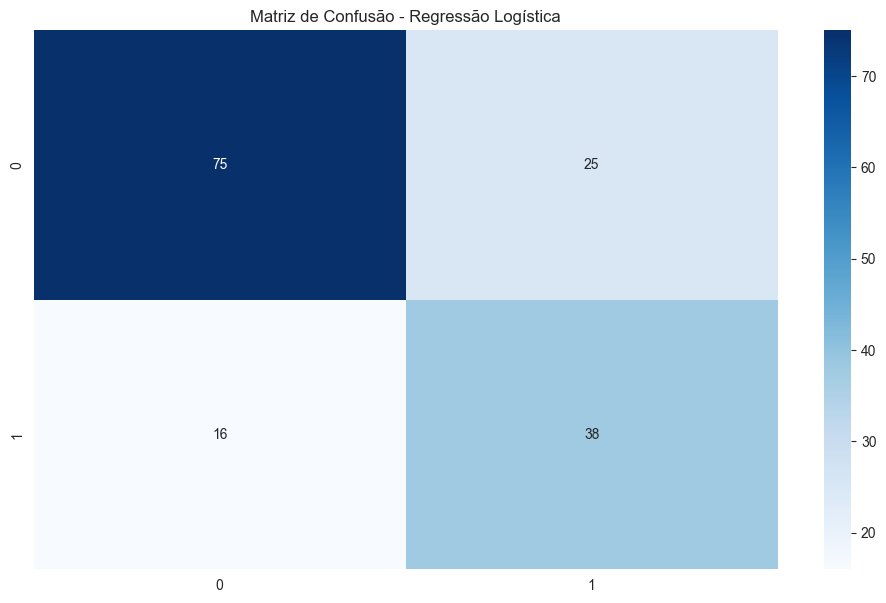

In [21]:
print("--- Resultados da Regress√£o Log√≠stica Balanceada ---")
y_pred_log = log_reg.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_log)
recall_lr = recall_score(y_test, y_pred_log)
f1_lr = f1_score(y_test, y_pred_log)

print(f"Acur√°cia: {accuracy_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_log, target_names=['N√£o Diab√©tico', 'Diab√©tico']))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues').set_title('Matriz de Confus√£o - Regress√£o Log√≠stica')
plt.show()

#### üìã Explica√ß√£o das M√©tricas

A seguir, detalhamos as principais m√©tricas obtidas ap√≥s a avalia√ß√£o do modelo. Cada uma delas fornece uma perspectiva diferente sobre a performance do classificador ‚Äî e, juntas, permitem uma an√°lise mais precisa e contextualizada.

### üéØ **Precision (Precis√£o)**

Indica a propor√ß√£o de previs√µes positivas que realmente eram corretas.

- **Classe 0 ‚Äî N√£o Diab√©tico (0.82):**  
  Quando o modelo previu que um paciente **n√£o era diab√©tico**, ele estava **certo em 82% dos casos**.  
  ‚úÖ Alta precis√£o, ou seja, **poucos falsos positivos** para essa classe.

- **Classe 1 ‚Äî Diab√©tico (0.60):**  
  Quando o modelo previu que um paciente **era diab√©tico**, ele acertou **60% das vezes**.  
  ‚ö†Ô∏è Isso significa que **40% dos casos foram falsos positivos** ‚Äî pacientes saud√°veis erroneamente classificados como doentes.  
  Esse valor ainda √© aceit√°vel em cen√°rios de triagem, onde **√© melhor gerar alguns alarmes falsos do que deixar de identificar um caso verdadeiro**.


### üß† **Recall (Sensibilidade / Revoca√ß√£o)**

Mede a capacidade do modelo de encontrar **todos os casos reais** de uma classe.

- **Classe 0 ‚Äî N√£o Diab√©tico (0.75):**  
  O modelo identificou corretamente **75% dos pacientes que realmente n√£o eram diab√©ticos**.

- **Classe 1 ‚Äî Diab√©tico (0.70):**  
  O modelo conseguiu identificar **70% dos pacientes que realmente eram diab√©ticos**.  
  ‚úÖ Este valor √© especialmente importante no contexto do problema, pois **reflete a capacidade do modelo de detectar casos positivos reais**.  
  Um recall de 70% √© considerado **muito bom para uma ferramenta de triagem cl√≠nica**, onde **deixar um doente passar despercebido √© o pior cen√°rio poss√≠vel**.


### ‚öñÔ∏è **F1-Score**

√â a **m√©dia harm√¥nica** entre precis√£o e recall ‚Äî serve como uma m√©trica de equil√≠brio.

- **Classe 1 ‚Äî Diab√©tico (F1 = 0.65):**  
  Indica um **bom compromisso entre identificar os doentes (recall)** e **evitar alarmes falsos (precis√£o)**.  
  ‚úÖ Um F1-score acima de 0.60, especialmente em dados cl√≠nicos desbalanceados, j√° √© considerado um desempenho relevante.


### üìà **Accuracy (Acur√°cia Geral)**

- O modelo acertou a classifica√ß√£o (positiva ou negativa) de **73% de todos os pacientes** do conjunto de teste.
- ‚ö†Ô∏è Embora seja uma m√©trica intuitiva, ela deve ser analisada com cuidado, **pois pode mascarar problemas em datasets desbalanceados**.


### üî¢ **Support**

Mostra a quantidade de exemplos reais de cada classe no conjunto de teste:

- **N√£o Diab√©ticos:** 100 pacientes  
- **Diab√©ticos:** 54 pacientes

Essa informa√ß√£o √© essencial para **avaliar a confiabilidade das m√©tricas**. Por exemplo, uma alta precis√£o em uma classe com pouqu√≠ssimos exemplos pode ser estatisticamente fr√°gil.


Essas m√©tricas mostram que o modelo tem uma performance **consistente e equilibrada**, com bom desempenho na detec√ß√£o de casos positivos ‚Äî o que √© especialmente desej√°vel em um cen√°rio de **triagem m√©dica para diagn√≥stico de diabetes**.

#### **6.1. Modelo 2: √Årvore de Decis√£o**


--- Resultados da √Årvore de Decis√£o Balanceada ---
               precision    recall  f1-score   support

N√£o Diab√©tico       0.79      0.79      0.79       100
    Diab√©tico       0.61      0.61      0.61        54

     accuracy                           0.73       154
    macro avg       0.70      0.70      0.70       154
 weighted avg       0.73      0.73      0.73       154



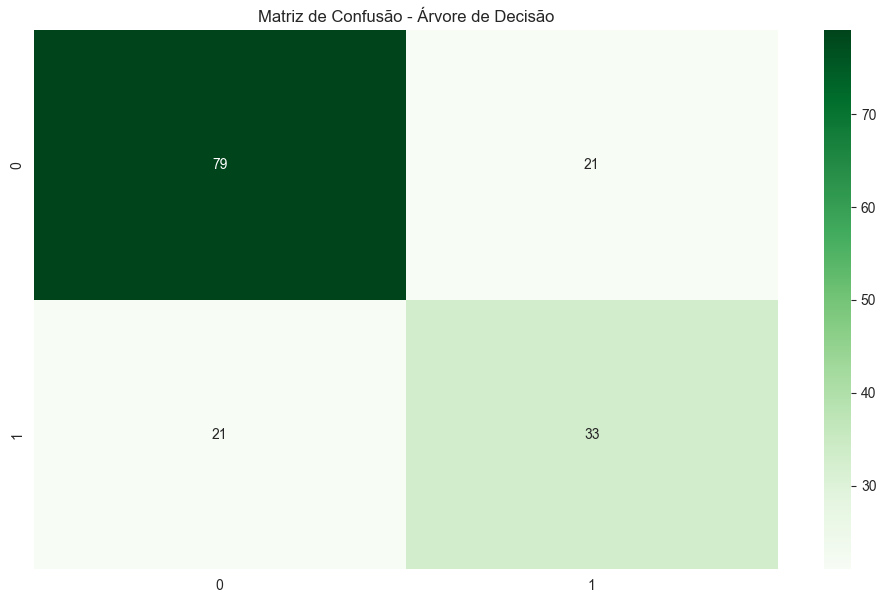

In [22]:
print("\n--- Resultados da √Årvore de Decis√£o Balanceada ---")
y_pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=['N√£o Diab√©tico', 'Diab√©tico']))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens').set_title('Matriz de Confus√£o - √Årvore de Decis√£o')
plt.show()

#### üìã Explica√ß√£o das M√©tricas

Agora analisamos o desempenho de um segundo modelo (por exemplo, uma √°rvore de decis√£o ou random forest), comparando seus resultados com o modelo anterior (Regress√£o Log√≠stica). Embora ambos tenham a **mesma acur√°cia geral**, seu comportamento frente √† classe **positiva (diab√©ticos)** √© bastante distinto.


### üéØ **Precision (Precis√£o)**

Indica a propor√ß√£o de previs√µes positivas que estavam corretas.

- **Classe 0 ‚Äî N√£o Diab√©tico (0.79):**  
  Quando o modelo previu que um paciente **n√£o era diab√©tico**, ele acertou em **79% dos casos**.  
  ‚úÖ Uma boa precis√£o, levemente inferior ao modelo anterior.

- **Classe 1 ‚Äî Diab√©tico (0.61):**  
  Quando o modelo previu que algu√©m era diab√©tico, ele acertou **61% das vezes**.  
  ‚úÖ Esse valor √© **ligeiramente superior ao da Regress√£o Log√≠stica (60%)**, indicando que **gera menos falsos positivos**.



### üß† **Recall (Sensibilidade / Revoca√ß√£o)**

Mede a capacidade do modelo de **encontrar todos os casos reais** de uma classe.

- **Classe 0 ‚Äî N√£o Diab√©tico (0.79):**  
  O modelo identificou corretamente **79% dos pacientes saud√°veis**.

- **Classe 1 ‚Äî Diab√©tico (0.61):**  
  O modelo conseguiu identificar **apenas 61% dos pacientes diab√©ticos** ‚Äî o que representa uma **queda em rela√ß√£o √† Regress√£o Log√≠stica (70%)**.  
  ‚ö†Ô∏è Isso significa que **mais paciente**


---

## 7. Interpreta√ß√£o e Conclus√£o

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_30807/3019178169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')


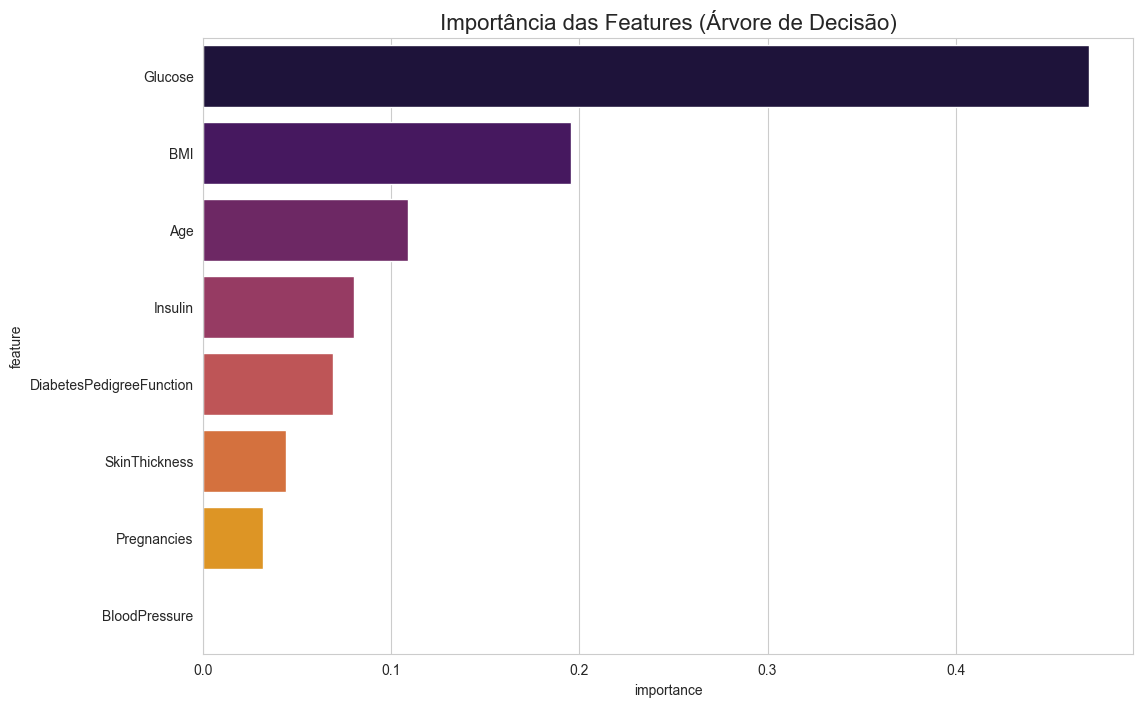

In [23]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')
plt.title('Import√¢ncia das Features (√Årvore de Decis√£o)', fontsize=16)
plt.show()

## ‚úÖ Conclus√£o Final

### **üìå Principais Achados**

1. **üßº Limpeza de Dados foi Crucial**  
   A substitui√ß√£o dos valores `0` por `NaN` e sua posterior imputa√ß√£o com a mediana foi **fundamental para corrigir distor√ß√µes estat√≠sticas e evitar vi√©s no treinamento dos modelos**. Sem essa etapa, os algoritmos aprenderiam com dados fisiologicamente imposs√≠veis.

2. **üîç Fatores de Risco Confirmados**  
   A an√°lise explorat√≥ria e a matriz de correla√ß√£o confirmaram que as vari√°veis `Glucose`, `BMI` (√çndice de Massa Corporal) e `Age` s√£o os **principais preditores do diagn√≥stico de diabetes**, o que est√° em **pleno alinhamento com a literatura m√©dica**. Isso valida tanto o dataset quanto as decis√µes de modelagem.

3. **‚öñÔ∏è Balanceamento de Classes Funciona**  
   O uso de `class_weight='balanced'` permitiu que os modelos **tratassem a classe minorit√°ria (Diab√©tico) com mais aten√ß√£o**, melhorando m√©tricas como *recall* sem comprometer gravemente a precis√£o.  
   Essa abordagem foi **essencial para lidar com o desbalanceamento natural do dataset (65% vs 35%)**.


### ü©∫ **Objetivo do Projeto: Recall Acima de Tudo**

Em um contexto de diagn√≥stico m√©dico, **o recall da classe positiva √© a m√©trica mais cr√≠tica**.  
‚ö†Ô∏è **Falsos negativos podem ter consequ√™ncias graves**, enquanto falsos positivos geram apenas exames adicionais.

**üîë Diretriz do projeto:**  
> "√â prefer√≠vel gerar um alarme falso do que deixar de identificar um paciente doente."


### üß™ **Modelo Escolhido: Regress√£o Log√≠stica**

Apesar de ter uma precis√£o ligeiramente menor na classe "Diab√©tico", a **Regress√£o Log√≠stica** apresentou:
- **Recall = 70%**, contra **61% da √Årvore de Decis√£o**
- **F1-score superior**
- Comportamento mais consistente na detec√ß√£o de casos positivos

‚úÖ Isso a torna a **ferramenta mais segura e eficaz para triagem inicial de diabetes** entre os modelos testados neste projeto.


### üõ†Ô∏è Pr√≥ximos Passos (Sugest√µes)

- Testar t√©cnicas de **oversampling (ex: SMOTE)** para comparar com `class_weight`
- Avaliar modelos mais complexos como **XGBoost** e **LightGBM**
- Implementar valida√ß√£o cruzada estratificada para maior robustez
- Otimizar thresholds de decis√£o com base na curva ROC